# SIMULATION FOR CLASSIC Vs. SORTED SOLID WASTE

In [176]:
"""Import Statemets"""
import random as rnd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.preprocessing import normalize

### Section for the Classic Case of Solid Waste Management Analysis

In [201]:
"""
Here below we create the classes of objects needed for the classic case, therefore we identify:
1) Bin (as household bin simulation)
2) Simulation Object; this is going to be handling all the details

"""
class Bin(object):
    
    def __init__(self, MAX_volume_category_A, MAX_volume_category_B, building_name, bin_number, 
                 average_Trash_A, variance_Trash_A, average_Trash_B, variance_Trash_B,
                 A_bin_residual_space=0, B_bin_residual_space=0 ):
        
        #Stats of the random distributions (assumed to be Normal) of the two types of Trash
        self.average_Trash_A =  average_Trash_A
        self.variance_Trash_A =  variance_Trash_A 
        self.average_Trash_B =  average_Trash_B 
        self.variance_Trash_B =  variance_Trash_B
        
        # Constant of the Bin's volume. The normal Bin will have a volume set up
        # more or less at the same value for all the households
        self.MAX_volume_category_A = MAX_volume_category_A
        self.MAX_volume_category_B = MAX_volume_category_B
        
        # The following vairable is no the residual empty space but the residual FULL space
        # occupied by the 
        self.A_bin_residual_space = A_bin_residual_space
        self.B_bin_residual_space = B_bin_residual_space
        
        # list fo recording the trend of the FULLess of the bins (the value recordeed should NOT 
        # ever record a value of the bin "too much" bigger than the MAX_volume
        self.A_to_trash_this_stage = []
        self.B_to_trash_this_stage = []

        # here we imagine a feedback from the trashing company which is suggesting to trash 
        # the trash for a specific category even if that category has not reached the thresold level
        self.A_feedback = 0
        self.B_feedback = 0
        
        # identification number
        self.building_name = building_name
        self.bin_number = bin_number
        
        # statistic counter on how many times tash has been cleared
        self.A_empty_counter = 0
        self.B_empty_counter = 0
        
    def add_to_A(self):
        """ This is the method which is generating the daily amount of trash for A category"""
        self.A_bin_residual_space = round( self.A_bin_residual_space + rnd.gauss(self.average_Trash_A, self.variance_Trash_A) , 2)
        self.A_to_trash_this_stage.append(self.A_bin_residual_space)

        
    def add_to_B(self):
        """ This is the method which is generating the daily amount of trash for B category"""
        self.B_bin_residual_space = round(self.B_bin_residual_space + rnd.gauss(self.average_Trash_B, self.variance_Trash_B), 2) 
        self.B_to_trash_this_stage.append(self.B_bin_residual_space)

        
    def day_trashing(self):
        """ This is the normal trashing DAILY algorithm"""
        self.add_to_A()          
        self.add_to_B()
        
        if  self.A_bin_residual_space >= self.MAX_volume_category_A:
  
            self.A_bin_residual_space = 0
            self.A_empty_counter += 1

        if self.B_bin_residual_space >= self.MAX_volume_category_B:
            
            self.B_bin_residual_space = 0
            self.B_empty_counter += 1
    
    
    def get_building_name(self):
        
        return self.building_name
    
    def get_bin_number(self):
    
        return self.bin_number
    
    def A_get_trash_tot_at_this_stage(self):
        
        return self.A_to_trash_this_stage[-1]
    
    def B_get_trash_tot_at_this_stage(self):
        
        return self.B_to_trash_this_stage[-1]
    

    
    
class Simulation(object):
    
    def __init__(self, bins_per_building, number_of_buildings, average_Trash_A, variance_Trash_A , average_Trash_B , variance_Trash_B):
        
        self.bins_per_building = range(bins_per_building)
        
        self.number_of_buildings = range(number_of_buildings)
        
        self.container_list = []
        
        # 
        self.A_list_of_total_trash_at_time = []
        self.B_list_of_total_trash_at_time = []
 
        # Stats of the random distributions (assumed to be Normal) of the two types of Trash
        self.average_Trash_A =  average_Trash_A
        self.variance_Trash_A =  variance_Trash_A 
        self.average_Trash_B =  average_Trash_B 
        self.variance_Trash_B =  variance_Trash_B
         
        # this section creates the list of ALL the bins. Every Bin is named after a Building Number AND
        # a specific bin number
        for building in self.number_of_buildings:
            for bin_ in self.bins_per_building:
                
                self.container_list.append(Bin(50,50,building + 1 ,bin_ + 1, average_Trash_A, variance_Trash_A , average_Trash_B , variance_Trash_B))
                
    def return_the_container_list(self):
        
        return self.container_list
    
    def A_get_last_amount(self):
        return self.A_list_of_total_trash_at_time[-1]

    def B_get_last_amount(self):
        return self.B_list_of_total_trash_at_time[-1]
    
    def A_get_time_series_amount(self):
        return self.A_list_of_total_trash_at_time

    def B_get_time_series_amount(self):
        return self.B_list_of_total_trash_at_time
        
                
    def simulation_run(self):
        
        total_A_trash = 0
        total_B_trash = 0
        
        for bin_ in self.container_list:

            bin_.day_trashing()
            total_A_trash = total_A_trash  + bin_.A_get_trash_tot_at_this_stage()
            total_B_trash = total_B_trash  + bin_.B_get_trash_tot_at_this_stage()

        
        self.A_list_of_total_trash_at_time.append(total_A_trash)
        self.B_list_of_total_trash_at_time.append(total_B_trash)
                

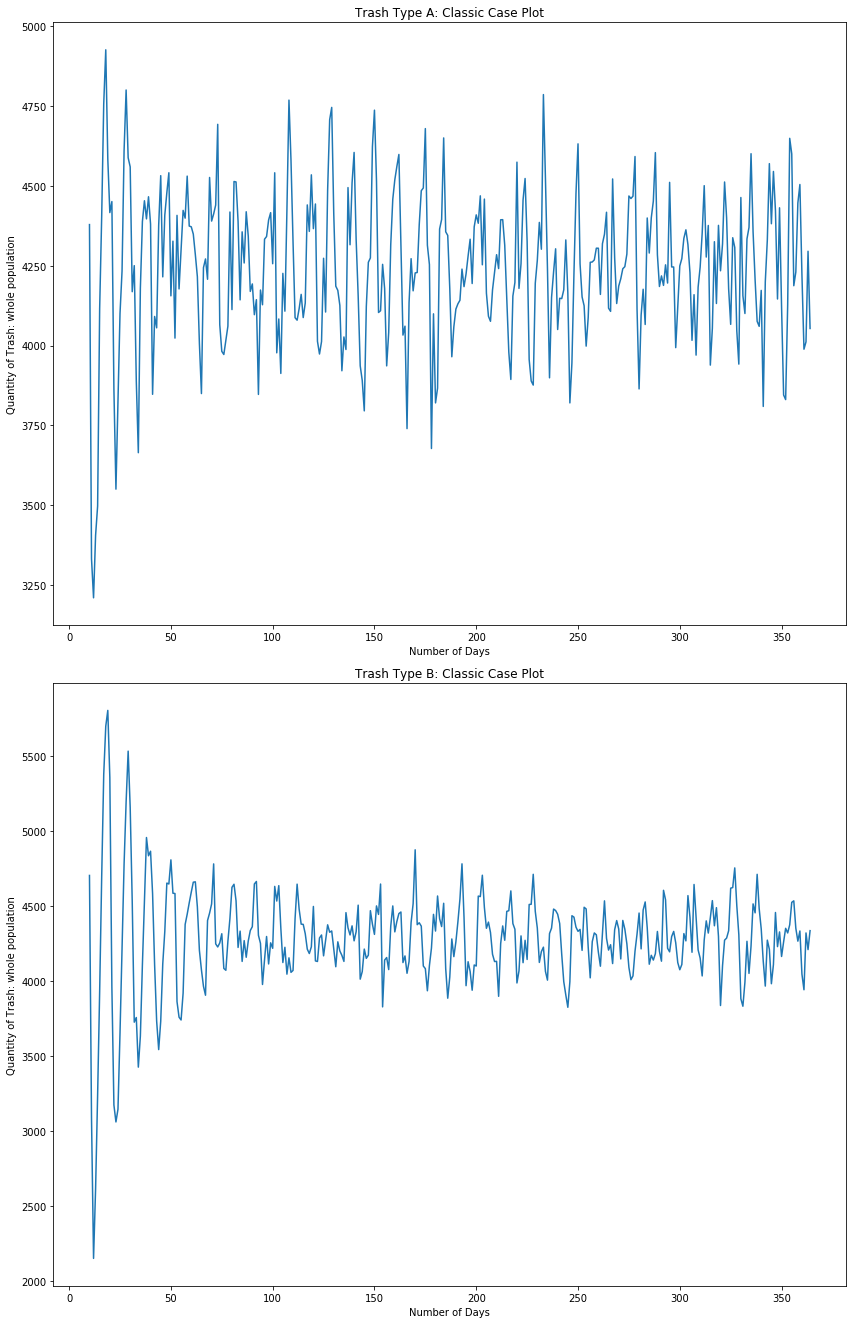

In [202]:
""" 
Simulation of the Classic Case
"""

simul = Simulation(15, 10, 5, 3, 5,2)
discreate_times = 365

for t in range(discreate_times):
    simul.simulation_run()
    

y1 = simul.A_get_time_series_amount()[10:]
 
y2 = simul.B_get_time_series_amount()[10:]

x1 = range(discreate_times)[10:]

fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(12, 18.5))

ax0.plot(x1, y1)
ax0.set_title('Trash Type A: Classic Case Plot')
ax0.set_xlabel('Number of Days')
ax0.set_ylabel('Quantity of Trash: whole population')

ax1.plot(x1, y2)
ax1.set_title('Trash Type B: Classic Case Plot')
ax1.set_xlabel('Number of Days')
ax1.set_ylabel('Quantity of Trash: whole population')

plt.tight_layout()
plt.show()


### Section for the Sorted Case (with feedback)

In this case we wil need to create another abstraction such as the one of the Communal Bin (i.e. the bin where every household is finally trashing the garbage).

In [50]:
"""
Utility function for summing up two vectors with the same shape

"""

def sum_of_2_vectors(vec1, vec2):
    
    vec_output = []
    
    for pos_ in range(len(vec1)):
        
        vec_output.append(vec1[pos_] + vec2[pos_])
        
    return vec_output



In [209]:
import random as rnd

class Bin_with_feedback(object):
    """
    This the model of the household's bin which is virtually receiving a feedback to perform the trashing of the garbadge.
    We model a bin which is suggesting to the user which type of garbadge is more convenient to move to the Communal Bin
    """
        
    def __init__(self, MAX_volume_category_A, MAX_volume_category_B, building_name, bin_number, 
             average_Trash_A, variance_Trash_A, average_Trash_B, variance_Trash_B,
             A_bin_residual_space=0, B_bin_residual_space=0 ):
        
        #Stats of the random distributions (assumed to be Normal) of the two types of Trash
        self.average_Trash_A =  average_Trash_A
        self.variance_Trash_A =  variance_Trash_A 
        self.average_Trash_B =  average_Trash_B 
        self.variance_Trash_B =  variance_Trash_B
        
        # Constant of the Bin's volume. The normal Bin will have a volume set up
        # more or less at the same value for all the households
        self.MAX_volume_category_A = MAX_volume_category_A
        self.MAX_volume_category_B = MAX_volume_category_B
        
        
        # Constant of the Bin's volume. The normal Bin will have a volume set up
        # more or less at the same value for all the households
        self.MAX_volume_category_A = MAX_volume_category_A
        self.MAX_volume_category_B = MAX_volume_category_B
        
        # The following vairable is no the residual empty space but the residual FULL space
        # occupied by the 
        self.A_bin_residual_space = A_bin_residual_space
        self.B_bin_residual_space = B_bin_residual_space
        
        # list fo recording the trend of the FULLess of the bins (the value recordeed should NOT 
        # ever record a value of the bin "too much" bigger than the MAX_volume
        self.A_to_trash_this_stage = []
        self.B_to_trash_this_stage = []

        # here we imagine a feedback from the trashing company which is suggesting to trash 
        # the trash for a specific category even if that category has not reached the thresold level
        self.A_feedback = 0
        self.B_feedback = 0
        
        # identification number
        self.building_name = building_name
        self.bin_number = bin_number
        
        # statistic counter on how many times tash has been cleared
        self.A_empty_counter = 0
        self.B_empty_counter = 0
        
    def set_A_feedback(self, fdbk):
        self.A_feedback = fdbk
    
    def set_B_feedback(self, fdbk):
        
        self.B_feedback = fdbk
        
        
    def add_to_A(self):
        """ This is the method which is generating the daily amount of trash for A category"""
        self.A_bin_residual_space = round(self.A_bin_residual_space + abs(rnd.gauss(5, 3)) , 2)
        self.A_to_trash_this_stage.append(self.A_bin_residual_space)

        
    def add_to_B(self):
        """ This is the method which is generating the daily amount of trash for B category"""
        self.B_bin_residual_space = round(self.B_bin_residual_space + abs(rnd.gauss(5, 3)), 2) 
        self.B_to_trash_this_stage.append(self.B_bin_residual_space)

  
    def day_trashing_waiting_for_feedback(self):
                
        self.add_to_A()          
        self.add_to_B()

    def day_trashing_after_feedback(self):
        """communal G Trashing because of feedback"""
        
        if (self.A_bin_residual_space >= self.MAX_volume_category_A or self.A_feedback == 1):  
            self.A_bin_residual_space = 0
            self.A_empty_counter += 1
            self.A_feedback = 0


        if (self.B_bin_residual_space >= self.MAX_volume_category_B or self.B_feedback == 1):
            self.B_bin_residual_space = 0
            self.B_empty_counter += 1
            self.B_feedback = 0
      
            
    def A_it_has_been_moved_to_communal_flag(self):
        """ when 0 we suppose that the bin has been moved to communal bin"""
        return self.A_bin_residual_space
    
    def B_it_has_been_moved_to_communal_flag(self):
        """ when 0 we suppose that the bin has been moved to communal bin"""
        return self.B_bin_residual_space 

    
    def get_building_name(self):
        """ method to get the name of the assigned building"""
        
        return self.building_name
    
    def get_bin_number(self):
        """ method to get the ID of the bin"""
        return self.bin_number
    
    def A_get_trash_tot_at_this_stage(self):
        
        return self.A_to_trash_this_stage[-1]
    
    def B_get_trash_tot_at_this_stage(self):
        
        return self.B_to_trash_this_stage[-1]
    

    
    
    
    
    
    
class Communal_Bin(object):
    
    """ 
    This Class represents the gardbage's Communal Bin. This bin is performing virtual calculations ad getting a centralized
    knowledge of the households' bins of its area.
    """
    
    def __init__(self, number_of_bins, number_of_buiding, communal_bin_Volume_Constant, 
                 MAX_volume_category_A, MAX_volume_category_B,
                 pecentage_communal_bin_for_sorting_A,
                 pecentage_communal_bin_for_sorting_B, 
                 average_Trash_A, variance_Trash_A, 
                 average_Trash_B, variance_Trash_B ):
        
        # these are how full a communal bins are
        self.communal_bin_A = 0
        self.communal_bin_B = 0

        # these are the trendline on how much the communal bin are full
        self.communal_bin_A_total_trend_line = []
        self.communal_bin_B_total_trend_line = []
        
        # values of percentage of load for sorting and return the feedback
        self.pecentage_communal_bin_for_sorting_A = pecentage_communal_bin_for_sorting_A
        self.pecentage_communal_bin_for_sorting_B = pecentage_communal_bin_for_sorting_B
        
        # trashing_trend
        self.time_Series_trashing_A = []
        self.time_Series_trashing_B = []
        
        # this section creates the list of ALL the bins. Every Bin is named after a Building Number AND
        # a specific bin number
        self.list_of_bins_per_building = []
        self.communal_bin_Volume_Constant = communal_bin_Volume_Constant
        
        for bin_ in range(number_of_bins):
                
                self.list_of_bins_per_building.append(Bin_with_feedback( MAX_volume_category_A, MAX_volume_category_B, number_of_buiding ,bin_ + 1, 
                                                                         pecentage_communal_bin_for_sorting_A, 
                                                                        pecentage_communal_bin_for_sorting_B, 
                                                                        average_Trash_A, variance_Trash_A, 
                                                                        average_Trash_B, variance_Trash_B))

    def get_communal_bin_A(self):
        return self.communal_bin_A_total_trend_line
        
    def get_communal_bin_B(self):
        return self.communal_bin_B_total_trend_line

    def A_get_communal_last_quatity(self):       
        return self.communal_bin_A_total_trend_line[-1]

    def B_get_communal_last_quatity(self):
        return self.communal_bin_B_total_trend_line[-1]

                
    def sorting_function_A(self, percentage_communal_bin=0.53):
        """ This function searches for all the trashbin for Category A and sorts them and returns the feedback list"""
        
        list_of_list_of_bins_volume_and_bin_number_A = []
        
        index_feedback_list = []
        
        volume_to_trash = 0
        
        # creation of a list for the sorting criteria
        for bin_ in self.list_of_bins_per_building:
                
                list_of_list_of_bins_volume_and_bin_number_A.append([bin_.A_get_trash_tot_at_this_stage(), bin_.get_bin_number()])

        # sorting the list on the volme of trash
        list_of_list_of_bins_volume_and_bin_number_A.sort(key=lambda x: x[0], reverse=True)
                
        for trash_bin in  list_of_list_of_bins_volume_and_bin_number_A:
            
            if volume_to_trash < self.communal_bin_Volume_Constant * self.pecentage_communal_bin_for_sorting_A:
                
                index_feedback_list.append(trash_bin[1])

                volume_to_trash = volume_to_trash + trash_bin[0]
                
        return index_feedback_list
    
    
    
    def sorting_function_B(self):
        """ This function searches for all the trashbin for Category B and sorts them and returns the feedback list"""
        
        list_of_list_of_bins_volume_and_bin_number_B = []
        
        index_feedback_list = []
        
        volume_to_trash = 0
        
        # creation of a list for the sorting criteria
        for bin_ in self.list_of_bins_per_building:
                
                list_of_list_of_bins_volume_and_bin_number_B.append([bin_.B_get_trash_tot_at_this_stage(), bin_.get_bin_number()])

        # sorting the list on the volme of trash
        list_of_list_of_bins_volume_and_bin_number_B.sort(key=lambda x: x[0], reverse=True)
    
        
        for trash_bin in  list_of_list_of_bins_volume_and_bin_number_B:
            
            if volume_to_trash < self.communal_bin_Volume_Constant * self.pecentage_communal_bin_for_sorting_B:
                
                index_feedback_list.append(trash_bin[1])
            
                volume_to_trash = volume_to_trash + trash_bin[0]
        
        return index_feedback_list
    
    
    def daily_trash_generation(self):
        """ This method triggers every household to generate the daily trash (for both categories)"""
        for household_bin in self.list_of_bins_per_building:
        
            household_bin.day_trashing_waiting_for_feedback()
            
    
    def trash_to_communal_decision(self):
        """ this method returns a feedback to the household to trash """
        
        self.daily_trash_generation()
        
        
        bin_indexes_to_Trash_A = self.sorting_function_A()

        bin_indexes_to_Trash_B = self.sorting_function_B()
          
            
        #this passage sets the feedback for all te households to suggest them to bring he trash to the communal bin
        for every_bin_in_communal in self.list_of_bins_per_building:
        
            if every_bin_in_communal.get_bin_number() in bin_indexes_to_Trash_A:
                
                every_bin_in_communal.set_A_feedback(1)
            
            if every_bin_in_communal.get_bin_number() in bin_indexes_to_Trash_B:
                
                every_bin_in_communal.set_B_feedback(1)
            
            
        # this passage send the households who received thefeedback to do the actual trahing (netting to zero their home bin)
        for every_bin_in_communal in self.list_of_bins_per_building:
            
            every_bin_in_communal.day_trashing_after_feedback()
            
            
        # calcultion of the quanity of trash for every building
        for every_bin_in_communal in self.list_of_bins_per_building:
                        
            if every_bin_in_communal.A_it_has_been_moved_to_communal_flag() == 0:
   
                self.communal_bin_A = self.communal_bin_A + every_bin_in_communal.A_get_trash_tot_at_this_stage()
                
                
            if every_bin_in_communal.B_it_has_been_moved_to_communal_flag() == 0:
                
                self.communal_bin_B = self.communal_bin_B + every_bin_in_communal.B_get_trash_tot_at_this_stage()
        

        
        
        self.communal_bin_A_total_trend_line.append(self.communal_bin_A)
        self.communal_bin_B_total_trend_line.append(self.communal_bin_B)
        
        #actual go and gathering of the communal bin
        
        if self.communal_bin_A_total_trend_line[-1] >= self.communal_bin_Volume_Constant * 0.90:
            
            self.time_Series_trashing_A.append(1)
            self.communal_bin_A = 0
            
        else:
            self.time_Series_trashing_A.append(0)
            
        if self.communal_bin_B_total_trend_line[-1] >= self.communal_bin_Volume_Constant * 0.90:

            self.time_Series_trashing_B.append(1)
            self.communal_bin_B = 0

        else:
            self.time_Series_trashing_B.append(0)
            
        
    def call_to_clean(self):
        
        if self.time_Series_trashing_A[-1] or self.time_Series_trashing_B[-1]:
            
            return 1
        
        else:
            
            return 0
        
        
            
class Simulation_with_fedback(object):
    """ 
    This is the Simulation Class. This object is taking as input several different variables such as:
    1) Volume_of_communal_Bin  
    2) percentage_cBin_for_daily_feedback_A 
    3) percentage_cBin_for_daily_feedback_B     
    4) verage_Trash_A 
    5) variance_Trash_A
    6) average_Trash_B 
    7) variance_Trash_B
    """
    def __init__(self, number_of_buildings, number_of_households_bins, Volume_of_communal_Bin , 
                 MAX_volume_category_A, MAX_volume_category_B,
                 percentage_cBin_for_daily_feedback_A, percentage_cBin_for_daily_feedback_B ,
                 average_Trash_A, variance_Trash_A , average_Trash_B , variance_Trash_B):
    
        self.total_places_to_collect_from = []
        
        self.total_trash_A = []
        self.total_trash_B = []
        
        self.Communal_Bins = []
        
        for buildings in range(number_of_buildings):
        
            self.Communal_Bins.append(Communal_Bin(number_of_households_bins, buildings + 1, 
                                                   Volume_of_communal_Bin, 
                                                   MAX_volume_category_A, MAX_volume_category_B,
                                                   percentage_cBin_for_daily_feedback_A, 
                                                   percentage_cBin_for_daily_feedback_B,
                                                   average_Trash_A, variance_Trash_A , 
                                                   average_Trash_B , variance_Trash_B))
        
            
    def daily_simulation_run(self):
        
        how_many_building_to_visit = 0
        
        for communal_bin in self.Communal_Bins:
            
            communal_bin.daily_trash_generation()
            
            communal_bin.trash_to_communal_decision()

            how_many_building_to_visit = how_many_building_to_visit + communal_bin.call_to_clean()
        
        self.total_places_to_collect_from.append(how_many_building_to_visit)
        
        
    def get_tend_ofBuildings_to_visit(self):
        
        return self.total_places_to_collect_from

    def total_trend_line_A(self):
        
        trend_line_A = []
        
        for communal_bin in self.Communal_Bins:
            
            if len(trend_line_A) == 0:
                
                trend_line_A = communal_bin.get_communal_bin_A()
                
            else:
                
                trend_line_A = sum_of_2_vectors(trend_line_A, communal_bin.get_communal_bin_A())
                
        return  trend_line_A
    
    

    def total_trend_line_B(self):
        
        trend_line_B = []
        
        for communal_bin in self.Communal_Bins:
            
            if len(trend_line_B) == 0:
                
                trend_line_B = communal_bin.get_communal_bin_B()
            else:
                
                trend_line_B = sum_of_2_vectors(trend_line_B, communal_bin.get_communal_bin_B() )
                
        return  trend_line_B 
    
    

5
0.5


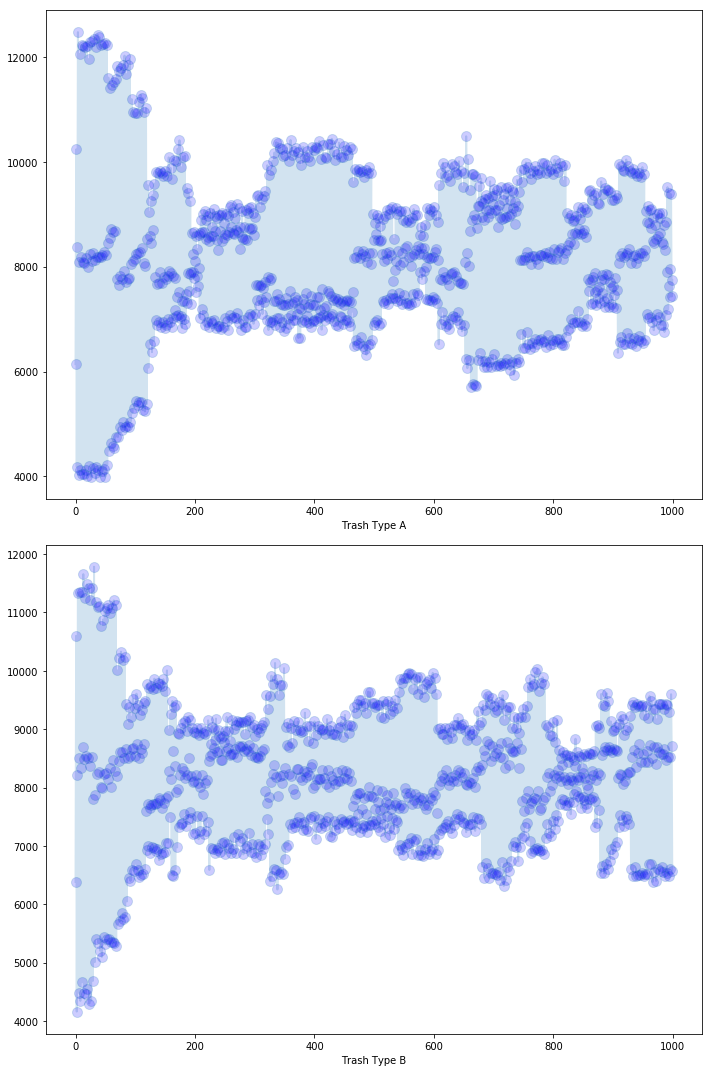

(0.3279641, 1.6662251736220726e-26)


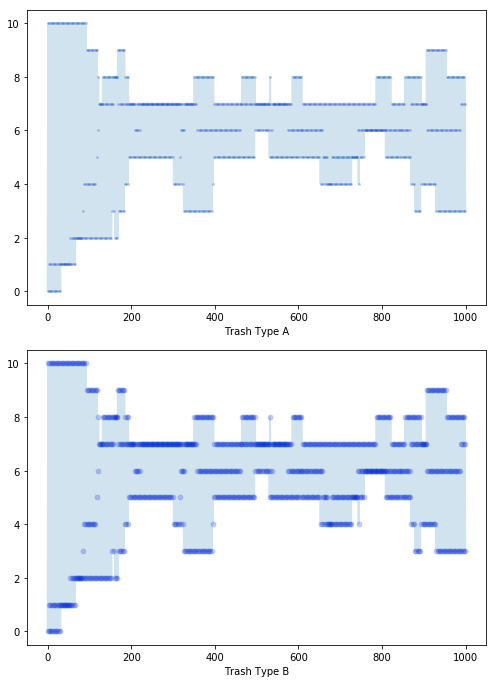

In [211]:


number_of_buildings = 10 # 10 is 1st equilibrium solution
number_of_households_bins = 40 #25 is 1st equilibrium solution
days_of_the_simulation = 1000
# on the first equilibrium solution 
simul2 = Simulation_with_fedback(number_of_buildings, number_of_households_bins,  1000, 50, 50, 0.7, 0.7, 5,7,5,6)

for i in range(days_of_the_simulation):
    simul2.daily_simulation_run()

l = simul2.get_tend_ofBuildings_to_visit()

average_building_to_visit = (sum(l)/len(l))
print average_building_to_visit
print float(average_building_to_visit)/float(number_of_buildings)

Trend_Trash_A_with_feedback_system = simul2.total_trend_line_A()
Trend_Trash_B_with_feedback_system = simul2.total_trend_line_B()


Days_of_feedback_simuation_A = range(days_of_the_simulation)
Days_of_feedback_simuation_B = range(days_of_the_simulation)

fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(10, 15))

ax0.plot(Days_of_feedback_simuation_A, Trend_Trash_A_with_feedback_system, '-o', ms=10, lw=2, alpha=0.2, mfc='blue')
ax0.set_xlabel('Trash Type A')


ax1.plot(Days_of_feedback_simuation_B, Trend_Trash_B_with_feedback_system, '-o', ms=10, lw=2, alpha=0.2, mfc='blue')
ax1.set_xlabel('Trash Type B')

plt.tight_layout()
plt.show()

array_Trend_Trash_A_with_feedback_system = np.array(Trend_Trash_A_with_feedback_system, dtype=np.float32)
array_Trend_Trash_B_with_feedback_system = np.array(Trend_Trash_B_with_feedback_system, dtype=np.float32)


#normalization
array_Trend_Trash_A_with_feedback_system = (array_Trend_Trash_A_with_feedback_system-array_Trend_Trash_A_with_feedback_system.min())/(array_Trend_Trash_A_with_feedback_system.max()-array_Trend_Trash_A_with_feedback_system.min())
array_Trend_Trash_B_with_feedback_system = (array_Trend_Trash_B_with_feedback_system-array_Trend_Trash_B_with_feedback_system.min())/(array_Trend_Trash_B_with_feedback_system.max()-array_Trend_Trash_B_with_feedback_system.min())

print(stats.pearsonr(array_Trend_Trash_A_with_feedback_system, array_Trend_Trash_B_with_feedback_system))

# Figure width is doubled (2*6.4) to display nicely 2 subplots side by side.
fig, (ax3, ax4) = plt.subplots(nrows=2, figsize=(7, 9.6))
 
ax3.plot(Days_of_feedback_simuation_A, simul2.get_tend_ofBuildings_to_visit(), '-o', ms=2, lw=2, alpha=0.2, mfc='blue')
ax3.set_xlabel('Trash Type A')

ax4.plot(Days_of_feedback_simuation_B, simul2.get_tend_ofBuildings_to_visit(), '-o', ms=5, lw=2, alpha=0.2, mfc='blue')
ax4.set_xlabel('Trash Type B')

plt.tight_layout()
 

plt.show()

7
0.466666666667


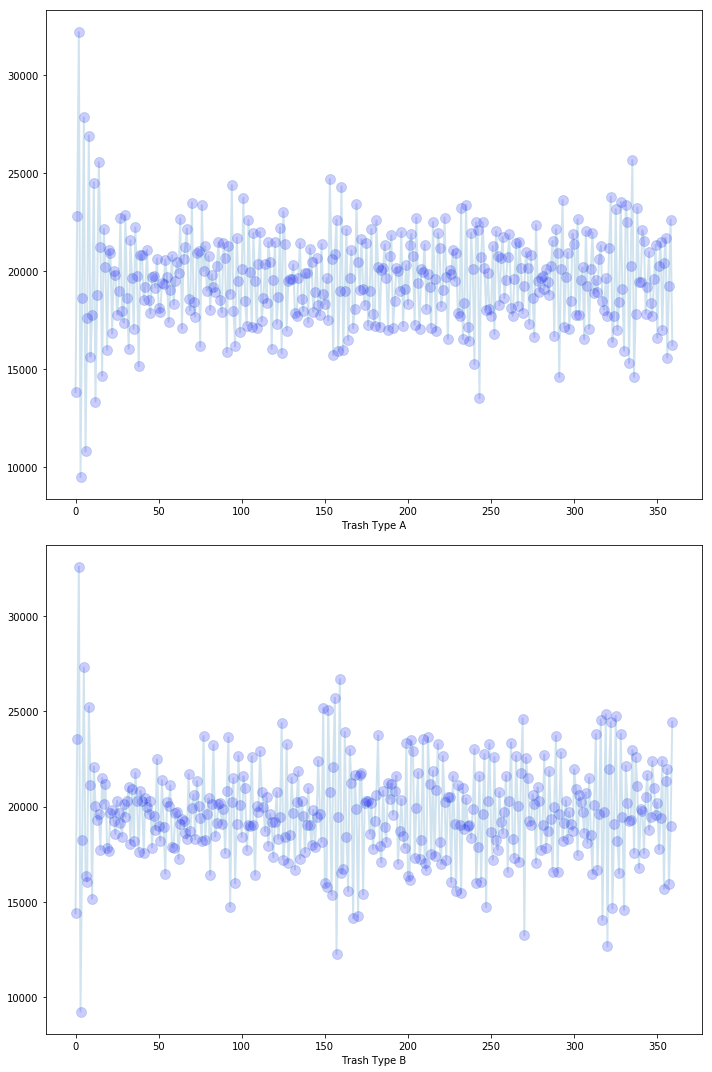

(0.21270172, 4.7348386836252465e-05)


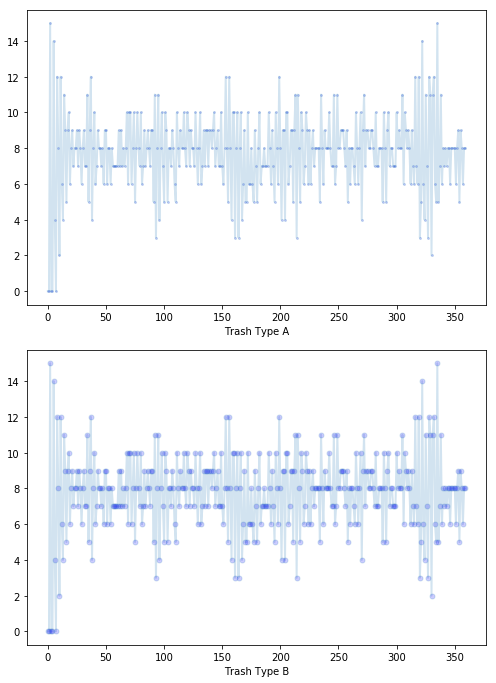

In [212]:


number_of_buildings = 15 # 10 is 1st equilibrium solution
number_of_households_bins = 60 #25 is 1st equilibrium solution
days_of_the_simulation = 360
# on the first equilibrium solution 
# simul2 = Simulation_with_fedback(number_of_buildings, number_of_households_bins, 1000, indepenedent, independent)
simul3 = Simulation_with_fedback(number_of_buildings, number_of_households_bins, 2000, 50, 50, 0.7, 0.7, 5,7,5,6)

for i in range(days_of_the_simulation):
    simul3.daily_simulation_run()

    
l = simul3.get_tend_ofBuildings_to_visit()

average_building_to_visit = (sum(l)/len(l))
print average_building_to_visit
print float(average_building_to_visit)/float(number_of_buildings)

import numpy as np
import matplotlib.pyplot as plt



Trend_Trash_A_with_feedback_system = simul3.total_trend_line_A()
Trend_Trash_B_with_feedback_system = simul3.total_trend_line_B()


Days_of_feedback_simuation_A = range(days_of_the_simulation)
Days_of_feedback_simuation_B = range(days_of_the_simulation)


# Figure width is doubled (2*6.4) to display nicely 2 subplots side by side.
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(10, 15))

# Demo of the default settings, with a user-defined unit label.
#ax0.set_title('Full unit ticklabels, w/ default precision & space separator')
#formatter0 = EngFormatter(unit='Hz')
#ax0.xaxis.set_major_formatter(formatter0)


ax0.plot(Days_of_feedback_simuation_A, Trend_Trash_A_with_feedback_system, '-o', ms=10, lw=2, alpha=0.2, mfc='blue')
ax0.set_xlabel('Trash Type A')

# Demo of the options `places` (number of digit after decimal point) and
# `sep` (separator between the number and the prefix/unit).
#ax1.set_title('SI-prefix only ticklabels, 1-digit precision & '
#              'thin space separator')
#formatter1 = EngFormatter(places=1, sep=u"\N{THIN SPACE}")  # U+2009
#ax1.xaxis.set_major_formatter(formatter1)
ax1.plot(Days_of_feedback_simuation_B, Trend_Trash_B_with_feedback_system, '-o', ms=10, lw=2, alpha=0.2, mfc='blue')
ax1.set_xlabel('Trash Type B')

plt.tight_layout()
 

plt.show()

from scipy import stats
import numpy as np
from sklearn.preprocessing import normalize

array_Trend_Trash_A_with_feedback_system = np.array(Trend_Trash_A_with_feedback_system, dtype=np.float32)
array_Trend_Trash_B_with_feedback_system = np.array(Trend_Trash_B_with_feedback_system, dtype=np.float32)



#normalization
array_Trend_Trash_A_with_feedback_system = (array_Trend_Trash_A_with_feedback_system-array_Trend_Trash_A_with_feedback_system.min())/(array_Trend_Trash_A_with_feedback_system.max()-array_Trend_Trash_A_with_feedback_system.min())
array_Trend_Trash_B_with_feedback_system = (array_Trend_Trash_B_with_feedback_system-array_Trend_Trash_B_with_feedback_system.min())/(array_Trend_Trash_B_with_feedback_system.max()-array_Trend_Trash_B_with_feedback_system.min())

print(stats.pearsonr(array_Trend_Trash_A_with_feedback_system, array_Trend_Trash_B_with_feedback_system))

# Figure width is doubled (2*6.4) to display nicely 2 subplots side by side.
fig, (ax3, ax4) = plt.subplots(nrows=2, figsize=(7, 9.6))
 
ax3.plot(Days_of_feedback_simuation_A, simul3.get_tend_ofBuildings_to_visit(), '-o', ms=2, lw=2, alpha=0.2, mfc='blue')
ax3.set_xlabel('Trash Type A')

ax4.plot(Days_of_feedback_simuation_B, simul3.get_tend_ofBuildings_to_visit(), '-o', ms=5, lw=2, alpha=0.2, mfc='blue')
ax4.set_xlabel('Trash Type B')

plt.tight_layout()
 

plt.show()